In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# what's the problem??!!
# remember sometime the you need to change the encoder

a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [4]:
G=nx.Graph()
c=0
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split(',')
    if c>3:
        G.add_edge(n[0],n[1])
    c+=1
a.close()

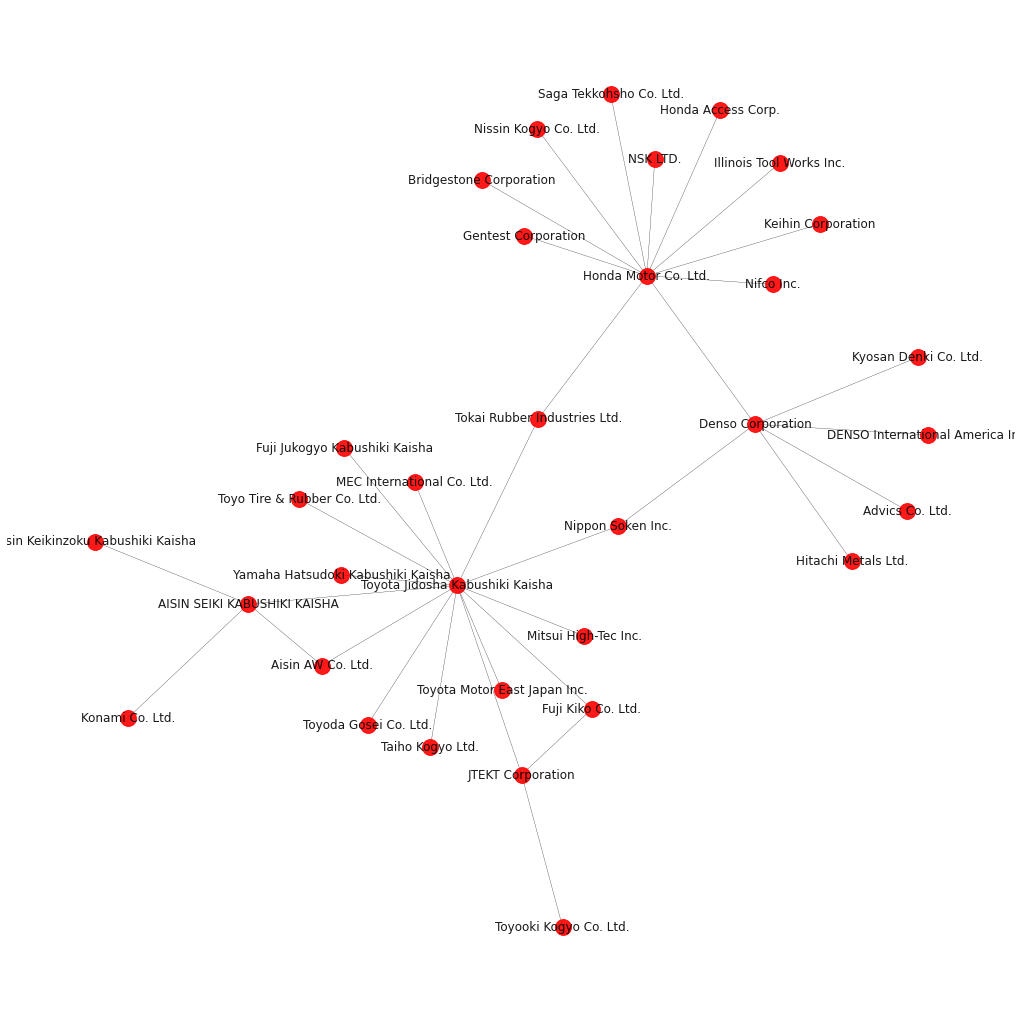

In [22]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=i
    counter+=1



nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

In [6]:
# let's consider the same network as done so far
# the betweenness can be computed directly

l=nx.betweenness_centrality(G) # this is the function

# let's create the list of [betweeneess,node id] to see the most central nodes

betweenness=[]
for i in G.nodes():
    betweenness.append([l[i],i])
    
betweenness=sorted(betweenness,reverse=True)

In [7]:
# as done before let's cut the number of digits

for i in range(15):
    print ("Rank = ",i+1,"Betweenness = ", "{:.2f}".format(betweenness[i][0]), "Node id = ",betweenness[i][1])

Rank =  1 Betweenness =  0.71 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Betweenness =  0.50 Node id =  Honda Motor Co. Ltd.
Rank =  3 Betweenness =  0.32 Node id =  Tokai Rubber Industries Ltd.
Rank =  4 Betweenness =  0.26 Node id =  Denso Corporation
Rank =  5 Betweenness =  0.16 Node id =  Nippon Soken Inc.
Rank =  6 Betweenness =  0.12 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Betweenness =  0.06 Node id =  JTEKT Corporation
Rank =  8 Betweenness =  0.00 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  9 Betweenness =  0.00 Node id =  Toyota Motor East Japan Inc.
Rank =  10 Betweenness =  0.00 Node id =  Toyooki Kogyo Co. Ltd.
Rank =  11 Betweenness =  0.00 Node id =  Toyoda Gosei Co. Ltd.
Rank =  12 Betweenness =  0.00 Node id =  Toyo Tire & Rubber Co. Ltd.
Rank =  13 Betweenness =  0.00 Node id =  Taiho Kogyo Ltd.
Rank =  14 Betweenness =  0.00 Node id =  Saga Tekkohsho Co. Ltd.
Rank =  15 Betweenness =  0.00 Node id =  Nissin Kogyo Co. Ltd.


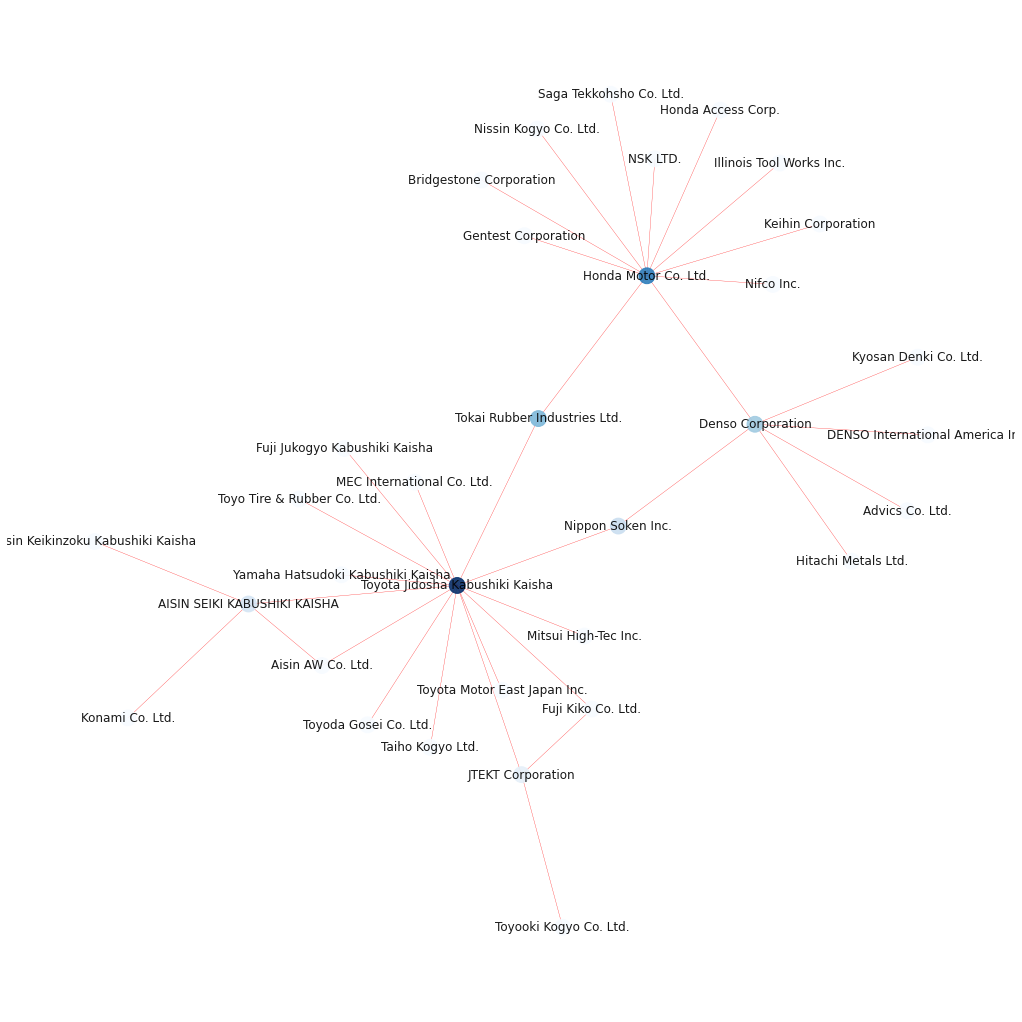

In [24]:
# let's plot the network using the betweenness as attribute

l=nx.betweenness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node

    
ids_label={} # this dictionary is needed to show the node ids
for i in G.nodes():
    ids_label[i]=str(i)


# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Red",cmap='Blues',
        node_color=color_code,labels=ids_label,font_size=12)

In [26]:
# let's plot the histogram
# we need to modify the function

# we need to change it to consider closeness
def betweenness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.betweenness_centrality(G)

    betweenness_list=[]
    for i in l:
            betweenness_list.append(l[i])
    
    plt.hist(betweenness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Betweenness')
    plt.ylabel('Frequency')

    plt.show()


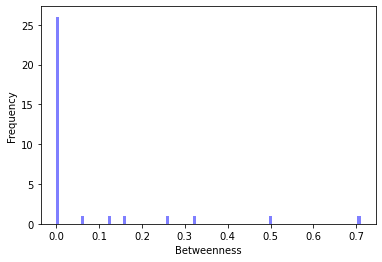

In [27]:
betweenness_histogram(G,100,'Blue',0.5)  # note the large number of bins, why do we need so many?

In [20]:
# we can change the function making it general in a way that we can use the same to plot the histogram
# of any centrality measure

def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l=nx.degree_centrality(G)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

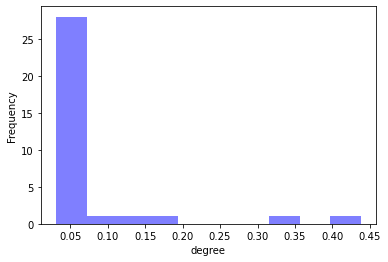

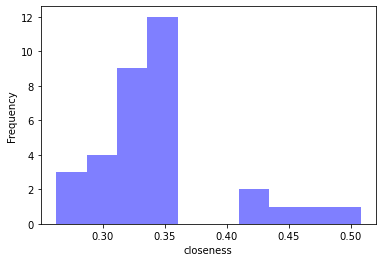

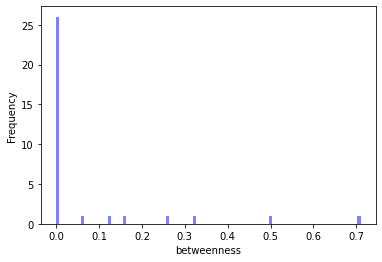

In [21]:
# we can then plot all of the them
centrality_histogram(G,10,'Blue',0.5,'degree')
centrality_histogram(G,10,'Blue',0.5,'closeness')
centrality_histogram(G,100,'Blue',0.5,'betweenness')

# Eigenvector centrality

In [33]:
# as for the others, we can just call the function

l=nx.eigenvector_centrality(G)

# let's compute the list of top nodes of this quantity
eigenv_centrality=[]
for i in G.nodes():
        eigenv_centrality.append([l[i],i])
eigenv_centrality=sorted(eigenv_centrality,reverse=True)

In [62]:
# let's see the top 10
for i in range(10):
    print ("Rank = ",i+1,"Eigenvector Cent. = ", "{:.2f}".format(eigenv_centrality[i][0]), "Node id = ",eigenv_centrality[i][1])

Rank =  1 Eigenvector Cent. =  0.65 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Eigenvector Cent. =  0.25 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  3 Eigenvector Cent. =  0.23 Node id =  JTEKT Corporation
Rank =  4 Eigenvector Cent. =  0.22 Node id =  Aisin AW Co. Ltd.
Rank =  5 Eigenvector Cent. =  0.22 Node id =  Fuji Kiko Co. Ltd.
Rank =  6 Eigenvector Cent. =  0.21 Node id =  Tokai Rubber Industries Ltd.
Rank =  7 Eigenvector Cent. =  0.19 Node id =  Nippon Soken Inc.
Rank =  8 Eigenvector Cent. =  0.19 Node id =  Honda Motor Co. Ltd.
Rank =  9 Eigenvector Cent. =  0.16 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  10 Eigenvector Cent. =  0.16 Node id =  Toyota Motor East Japan Inc.


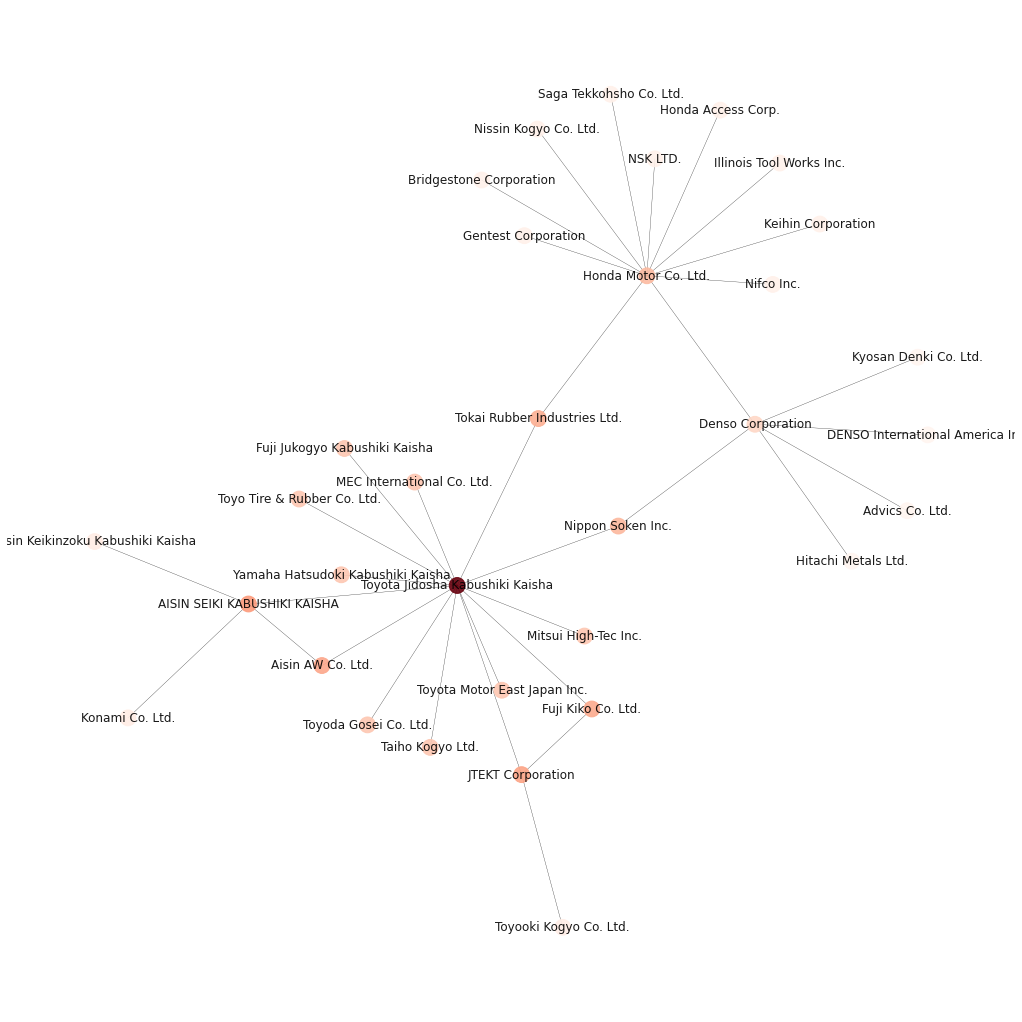

In [10]:
# what do we learn?

l=nx.eigenvector_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [11]:
# now that we have four metrics it is useful to write a general function that computes the correlation between any pair

# let's first write a function that extracts the ordered list of nodes according to one of the metrics

def get_centrality(G,type_centrality):
    
    
    # for each centrality measure we get the ordered list of values-node id
    if type_centrality=="degree":

        centrality=[]
        for i in G.nodes():
            centrality.append([G.degree(i),i])
        centrality=sorted(centrality,reverse=True)
        
        return centrality  # this means that the function returns as output the sorted list
        
    elif type_centrality=="closeness":

        l=nx.closeness_centrality(G)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    elif type_centrality=="betweenness":
        l=nx.betweenness_centrality(G)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    elif type_centrality=="eigenvector":
        l=nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
        centrality=[]
        for i in G.nodes():
            centrality.append([l[i],i])
        centrality=sorted(centrality,reverse=True)
        return centrality
    
    else:
        return 0

In [43]:
# now let's create another function that computes all the possible correlations

def correlation_centralities(G):
    
    # first we get the list of sorted values-node id from the previous function
    degree_centrality=get_centrality(G,"degree")
    closeness_centrality=get_centrality(G,"closeness")
    betweenness_centrality=get_centrality(G,"betweenness")
    eigenvector_centrality=get_centrality(G,"eigenvector")
    
    
    # then let's create a dictionary with how many keys as metrics
    # and as values the name of the metric and the sorted list of values-node id
    dict_centralities={}
    dict_centralities[0]=["degree",degree_centrality]
    dict_centralities[1]=["closeness",closeness_centrality]
    dict_centralities[2]=["betweenness",betweenness_centrality]
    dict_centralities[3]=["eigenvector",eigenvector_centrality]
    
    # now let's sue the function k_tau to compute the correlation between all the possible pairs
    # of different metrics

    list_correlations=[]
    for i in dict_centralities:
        for j in dict_centralities:  # this is a double for loop
            if i<j:  # why this condition?! 
                
                
                pair=dict_centralities[i][0]+"-"+dict_centralities[j][0] # this is string with the names of the two
                # centrality measures
                
                value=k_tau(dict_centralities[i][1],dict_centralities[j][1])[0]  # kendall's tau
                p_value=k_tau(dict_centralities[i][1],dict_centralities[j][1])[1]  # associated pvalue
                
                list_correlations.append([value,p_value,pair])  # let's put all the values in a list
                
                
    # let's sort the list from the highest to the lowest correlation
    list_correlations=sorted(list_correlations,reverse=True)
    return list_correlations  # let's return as output the list of correlation

In [12]:
list_correlations=correlation_centralities(G)

for i in list_correlations:
    print (i[2],"=",i[0])

NameError: name 'correlation_centralities' is not defined

In [13]:
# we need to change it to consider closeness
def closeness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.closeness_centrality(G)

    closeness_list=[]
    for i in l:
            closeness_list.append(l[i])
    
    plt.hist(closeness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Closeness')
    plt.ylabel('Frequency')

    plt.show()

# Closness Centrality

In [14]:
# we can compute the closeness quite easily
l=nx.closeness_centrality(G)

# let's create a list with the closeness values and see which nodes are at the top
closeness=[]
for i in G.nodes():
            closeness.append([l[i],i])
closeness=sorted(closeness,reverse=True)

In [15]:
# so we can change the code accordingly
for i in range(20):
    print ("Rank = ",i+1,"Closeness = ", "{:.2f}".format(closeness[i][0]), "Node id = ",closeness[i][1])

Rank =  1 Closeness =  0.51 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Closeness =  0.46 Node id =  Tokai Rubber Industries Ltd.
Rank =  3 Closeness =  0.45 Node id =  Honda Motor Co. Ltd.
Rank =  4 Closeness =  0.43 Node id =  Nippon Soken Inc.
Rank =  5 Closeness =  0.42 Node id =  Denso Corporation
Rank =  6 Closeness =  0.36 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  7 Closeness =  0.35 Node id =  JTEKT Corporation
Rank =  8 Closeness =  0.35 Node id =  Aisin AW Co. Ltd.
Rank =  9 Closeness =  0.35 Node id =  Fuji Kiko Co. Ltd.
Rank =  10 Closeness =  0.34 Node id =  Yamaha Hatsudoki Kabushiki Kaisha
Rank =  11 Closeness =  0.34 Node id =  Toyota Motor East Japan Inc.
Rank =  12 Closeness =  0.34 Node id =  Toyoda Gosei Co. Ltd.
Rank =  13 Closeness =  0.34 Node id =  Toyo Tire & Rubber Co. Ltd.
Rank =  14 Closeness =  0.34 Node id =  Taiho Kogyo Ltd.
Rank =  15 Closeness =  0.34 Node id =  Mitsui High-Tec Inc.
Rank =  16 Closeness =  0.34 Node id =  MEC Internationa

In [16]:
# let's see the histogram of this centrality
# remember we wrote a function to create and show the histogram for the degree

def degree_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    degree_list=[]
    for i in G.nodes():
        degree_list.append(G.degree(i))
    
    plt.hist(degree_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()

In [17]:
# we need to change it to consider closeness
def closeness_histogram(G,bins,color_bars,alpha_value): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    l=nx.closeness_centrality(G)

    closeness_list=[]
    for i in l:
            closeness_list.append(l[i])
    
    plt.hist(closeness_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel('Closeness')
    plt.ylabel('Frequency')

    plt.show()

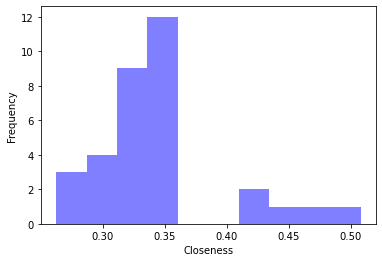

In [59]:
closeness_histogram(G,10,'blue',0.5)

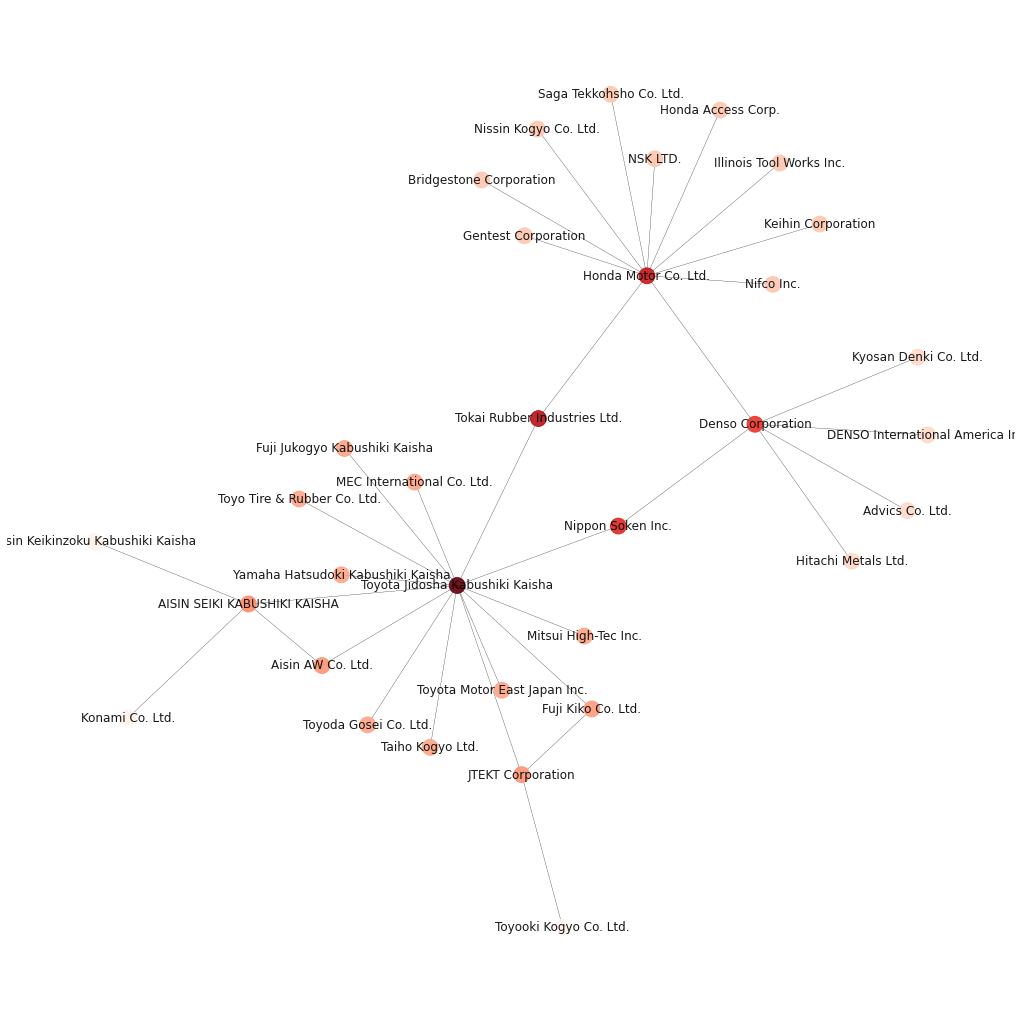

In [18]:
# let's plot the network considering closeness as attribute

l=nx.closeness_centrality(G)

color_code=[]  # this is the list
for i in l:
    color_code.append(l[i])  # each element in the list is the closeness of each node



# let's plot it

plt.figure(1,figsize=(14,14))

nx.draw(G, pos=nx.kamada_kawai_layout(G),alpha=0.9,
        node_size=250,width=0.3,edge_color="Black",cmap='Reds',
        node_color=color_code,labels=ids_label,font_size=12)

In [48]:
# what about the correlation between closeness and degree in this case?
# as before we can use the kendall tau 
# we created a function that takes as input the list of [value,id node]
# so we need to create the two lists

# let's get the degree first
def k_tau(degree_list,closeness_list):
    map_rank={} # dictionary to get the rank of each node according to a quantity
    c=1
    degree_list=[]
    for i in G.nodes():
        map_rank[i[1]]=c
        degree_list.append([G.degree(i),i])# order according to the first quantity
        c+=1
        
    closeness_list=[]
    for i in closeness_list:
        closeness_list.append(map_rank[i[1]]) # add them in order according to the second quantity but with the ranks of
                                        # the first
        
    tau = stats.kendalltau(degree_list,degree_list)  # get the kendall tau
    return tau    
        
    

In [49]:
print (k_tau(degree_list,closeness_list))

NameError: name 'degree_list' is not defined

In [25]:
list_degree=[]
for i in G.nodes():
    list_degree.append([G.degree(i),i])
    
    
l=nx.betweenness_centrality(G)
list_betweenness=[]
for i in l:
    list_betweenness.append([l[i],i])
    
    
l=nx.closeness_centrality(G)
list_closeness=[]
for i in l:
    list_closeness.append([l[i],i])    
    
list_degree=sorted(list_degree)
list_betweenness=sorted(list_betweenness)
list_closeness=sorted(list_closeness)

# let's call the function we wrote for computing the kendall's tau
print ("degree VS Betweenness=", k_tau(list_degree,list_betweenness))
print ("Closeness VS Betweenness=", k_tau(list_closeness,list_betweenness))


degree VS Betweenness= KendalltauResult(correlation=1.0, pvalue=1.9863524275045853e-27)
Closeness VS Betweenness= KendalltauResult(correlation=1.0, pvalue=1.9863524275045853e-27)


In [50]:
# we can change the function making it general in a way that we can use the same to plot the histogram
# of any centrality measure

def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l=nx.degree_centrality(G)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

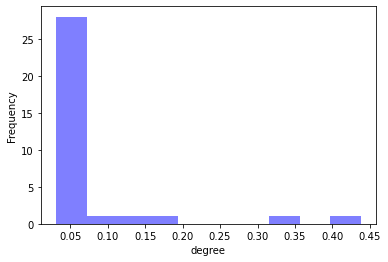

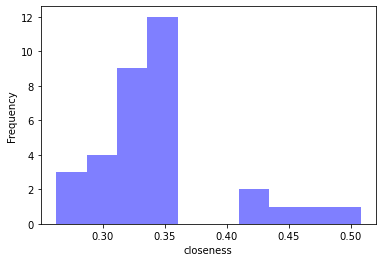

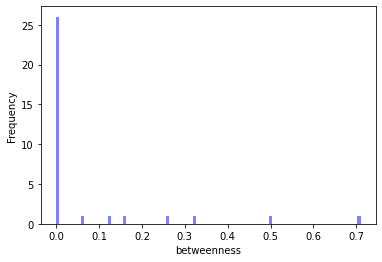

In [51]:
centrality_histogram(G,10,'Blue',0.5,'degree')
centrality_histogram(G,10,'Blue',0.5,'closeness')
centrality_histogram(G,100,'Blue',0.5,'betweenness')